## ANÁLISIS FACTORIAL _(Factor Analysis)_

Análisis estadístico para identificar factores subyacentes que explican las relaciones y patrones de las variables observadas y reducir la complejidad del sistema.

Esta extrae los que tienen varianzas comunes y ponerlas en un solo factor.

### Factor

Aspecto subyacente que haría las veces de dimensión o de variable que permite explicar la correlación entre más medidas. Se espera tener menos factores que variables

### Factores de carga

Son matrices que establecen la relación de cada variable con el factor subyacente, muestra la correlación entre los factores y los valores originales

### Valores Propios

Representan la varianza de cada factor, también llamadas raíces características.

### Factor de rotación

Transformaciones de datos que se hacen para extraer información adicional. 



In [1]:
import pandas as pd
import seaborn as sns
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [3]:
url = 'https://raw.githubusercontent.com/nicoavilan/Bases-de-datos/main/bfi.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2800 non-null   int64  
 1   A1          2784 non-null   float64
 2   A2          2773 non-null   float64
 3   A3          2774 non-null   float64
 4   A4          2781 non-null   float64
 5   A5          2784 non-null   float64
 6   C1          2779 non-null   float64
 7   C2          2776 non-null   float64
 8   C3          2780 non-null   float64
 9   C4          2774 non-null   float64
 10  C5          2784 non-null   float64
 11  E1          2777 non-null   float64
 12  E2          2784 non-null   float64
 13  E3          2775 non-null   float64
 14  E4          2791 non-null   float64
 15  E5          2779 non-null   float64
 16  N1          2778 non-null   float64
 17  N2          2779 non-null   float64
 18  N3          2789 non-null   float64
 19  N4          2764 non-null  

In [15]:
df.describe().T # Imprimir la transpuesta

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2800.0,64599.238214,1728.527002,61617.0,63080.0,64575.0,66092.25,67560.0
A1,2784.0,2.413434,1.407737,1.0,1.0,2.0,3.00,6.0
A2,2773.0,4.802380,1.172020,1.0,4.0,5.0,6.00,6.0
A3,2774.0,4.603821,1.301834,1.0,4.0,5.0,6.00,6.0
A4,2781.0,4.699748,1.479633,1.0,4.0,5.0,6.00,6.0
A5,2784.0,4.560345,1.258512,1.0,4.0,5.0,5.00,6.0
C1,2779.0,4.502339,1.241347,1.0,4.0,5.0,5.00,6.0
C2,2776.0,4.369957,1.318347,1.0,4.0,5.0,5.00,6.0
C3,2780.0,4.303957,1.288552,1.0,4.0,5.0,5.00,6.0
C4,2774.0,2.553353,1.375118,1.0,1.0,2.0,4.00,6.0


In [16]:
df.isnull().sum().sum()

731

In [12]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [17]:
df.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [18]:
df0 = df.drop(['Unnamed: 0','gender', 'education', 'age'], axis = 1)

In [19]:
df0.shape

(2800, 25)

In [23]:
df0.dropna( inplace = True )

In [24]:
df0.shape

(2436, 25)

In [26]:
df0.describe()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
count,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,...,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000
mean,2.406404,4.797209,4.598522,4.687603,4.543514,4.525041,4.372332,4.300082,2.549672,3.305829,...,2.943760,3.517652,3.224548,3.202381,2.971264,4.812808,2.684729,4.449918,4.925287,2.468801
std,1.407177,1.179535,1.311355,1.485213,1.270804,1.235258,1.319152,1.291202,1.376689,1.632720,...,1.575909,1.533238,1.594674,1.569633,1.623491,1.126613,1.552883,1.205206,1.193136,1.324021
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,1.000000,4.000000,4.000000,1.000000
50%,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,3.000000,...,3.000000,4.000000,3.000000,3.000000,3.000000,5.000000,2.000000,5.000000,5.000000,2.000000
75%,3.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,...,4.000000,5.000000,5.000000,4.000000,4.000000,6.000000,4.000000,5.000000,6.000000,3.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [27]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2436 entries, 0 to 2799
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2436 non-null   float64
 1   A2      2436 non-null   float64
 2   A3      2436 non-null   float64
 3   A4      2436 non-null   float64
 4   A5      2436 non-null   float64
 5   C1      2436 non-null   float64
 6   C2      2436 non-null   float64
 7   C3      2436 non-null   float64
 8   C4      2436 non-null   float64
 9   C5      2436 non-null   float64
 10  E1      2436 non-null   float64
 11  E2      2436 non-null   float64
 12  E3      2436 non-null   float64
 13  E4      2436 non-null   float64
 14  E5      2436 non-null   float64
 15  N1      2436 non-null   float64
 16  N2      2436 non-null   float64
 17  N3      2436 non-null   float64
 18  N4      2436 non-null   float64
 19  N5      2436 non-null   float64
 20  O1      2436 non-null   float64
 21  O2      2436 non-null   int64  
 22  O3   

Análisis exploratorio y correlación de datos

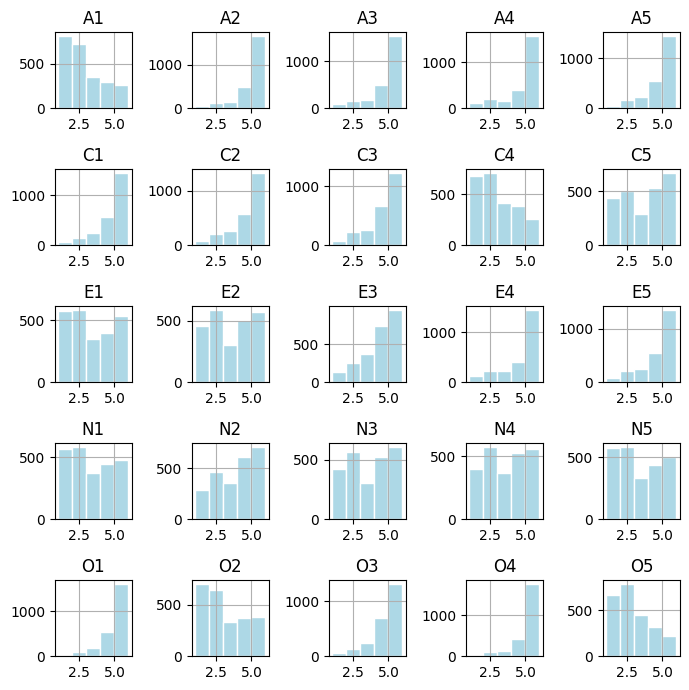

In [33]:
df0.hist( bins = 5 , color = 'lightblue', 
         figsize = (7, 7), edgecolor = 'white')
plt.tight_layout()
plt.show()

In [36]:
# Valor absoluto de los elementos de la matriz de correlación
abs(df0.corr())

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
A1,1.000000,0.350905,0.273636,0.156754,0.192698,0.014698,0.012918,0.020587,0.115074,0.038293,...,0.168279,0.139814,0.092366,0.042140,0.015181,0.005782,0.066176,0.063788,0.090512,0.099166
A2,0.350905,1.000000,0.503041,0.350856,0.397400,0.102983,0.129574,0.188818,0.146295,0.121106,...,0.093627,0.050476,0.040407,0.086735,0.019688,0.125633,0.013958,0.165319,0.082609,0.080838
A3,0.273636,0.503041,1.000000,0.384918,0.515679,0.114211,0.146511,0.129391,0.121116,0.153811,...,0.083266,0.092473,0.039158,0.127107,0.040143,0.150086,0.006588,0.226333,0.032267,0.041750
A4,0.156754,0.350856,0.384918,1.000000,0.325644,0.094813,0.226454,0.133065,0.172271,0.249675,...,0.106645,0.155289,0.073887,0.171228,0.015136,0.057075,0.037763,0.070983,0.049793,0.027308
A5,0.192698,0.397400,0.515679,0.325644,1.000000,0.134692,0.116863,0.130820,0.125531,0.167036,...,0.204765,0.198836,0.138472,0.215346,0.081404,0.162596,0.006988,0.238191,0.011354,0.050449
C1,0.014698,0.102983,0.114211,0.094813,0.134692,1.000000,0.438223,0.317270,0.362491,0.261079,...,0.071954,0.038180,0.025476,0.098035,0.047970,0.179249,0.129263,0.196562,0.100189,0.130471
C2,0.012918,0.129574,0.146511,0.226454,0.116863,0.438223,1.000000,0.362826,0.396090,0.303820,...,0.019951,0.005586,0.003189,0.044341,0.051212,0.161042,0.057347,0.192681,0.047427,0.066590
C3,0.020587,0.188818,0.129391,0.133065,0.130820,0.317270,0.362826,1.000000,0.357824,0.350949,...,0.079093,0.066880,0.077416,0.122175,0.023508,0.091141,0.029604,0.058880,0.011360,0.002809
C4,0.115074,0.146295,0.121116,0.172271,0.125531,0.362491,0.396090,0.357824,1.000000,0.487551,...,0.215852,0.158346,0.201905,0.270633,0.197062,0.093561,0.208072,0.083027,0.053014,0.189543
C5,0.038293,0.121106,0.153811,0.249675,0.167036,0.261079,0.303820,0.350949,0.487551,1.000000,...,0.216414,0.246298,0.241599,0.354664,0.179009,0.085630,0.122596,0.074129,0.135482,0.055804


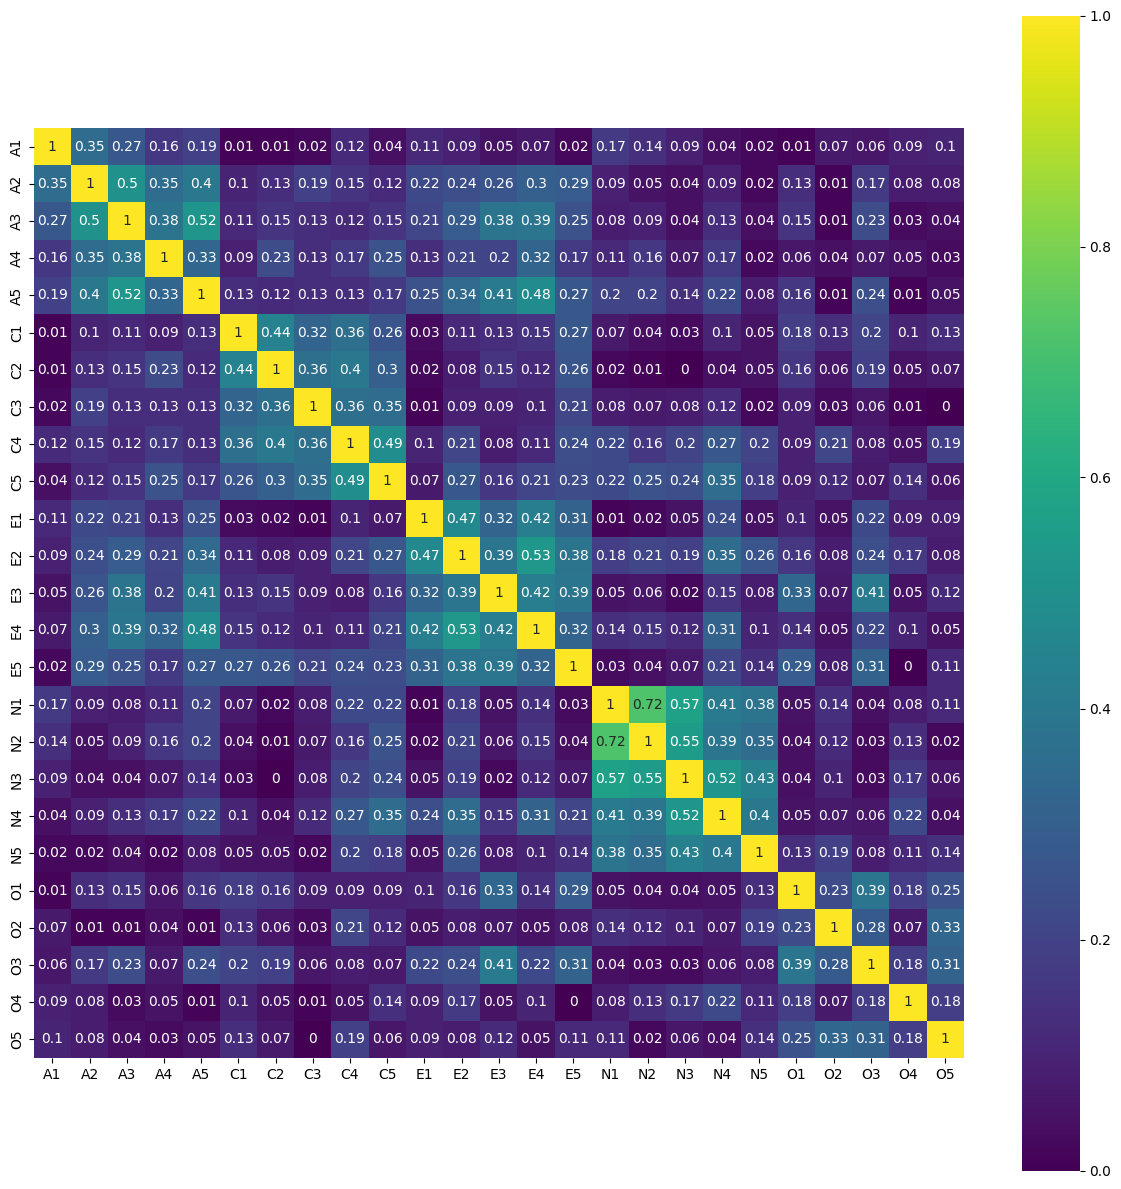

In [44]:
plt.figure( figsize = (15, 15))
sns.heatmap(abs(df0.corr()).round(2), cmap = 'viridis', annot = True, square = True)
plt.show()

Adequacy test

Se evalúa qué tan factorizable son los datos

* **Prueba de Barlett**. Evalúa correlación de las variables con la matriz identidad
* **Prueba de Kaiser-Mayer_olkin**: ¿Qué tan buenos son los datos para el anàlisis factorial

In [45]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [46]:
chi_square_value, p_value = calculate_bartlett_sphericity(df0)

In [47]:
p_value

0.0

p_value = 0 indica que la matriz de correlación no es una matriz de identidad

In [48]:
from factor_analyzer.factor_analyzer import calculate_kmo

In [49]:
kmo_all, kmo_model = calculate_kmo(df0)

In [50]:
kmo_model

0.8486452309468397

kmo toma valores en el rango $[0,1]$. Si el valor es inferior a $0.6$ se dice que la muestra no es adecuada para el procedimiento. Lo deseado es que el valor sea mayor que $0.8$

Para definir si se hace un análisis de gactorización busco:

- Que la matriz de correlación no sea semejante a la matriz identidad p_value $<0.05$.

- Que las variables sean factorizadas: kmo_model $>0.8.$

Estamos listos para calcular los factores!